In [7]:
!pip install wfdb

In [3]:
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, hilbert
import pandas as pd

In [3]:
wfdb.dl_database('mitdb', os.getcwd())

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

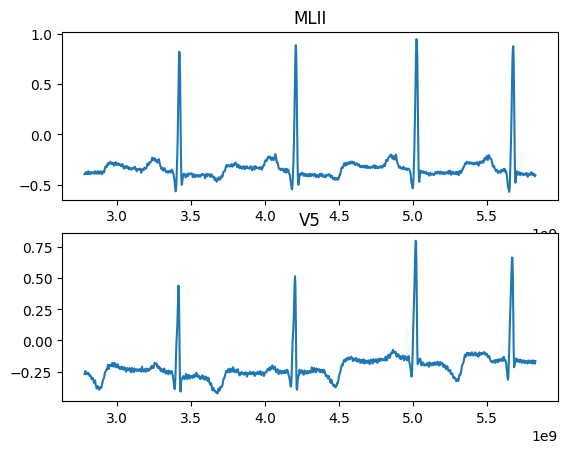

In [4]:
record = wfdb.rdrecord('100')
# help(record)
k=record.to_dataframe()
v=k['MLII']
plt.subplot(2,1,1)
plt.plot(v[1000:2100])
plt.title('MLII')
v=k['V5']
plt.subplot(2,1,2)
plt.title('V5')
plt.plot(v[1000:2100])
plt.show()

In [5]:
record = wfdb.rdrecord('100', sampto=3000)
ann = wfdb.rdann('100', 'atr', sampto=3000)
wfdb.plot_items(signal=record.p_signal,
                    ann_samp=[ann.sample, ann.sample],
                    title='MIT-BIH Record 100', time_units='seconds',
                    figsize=(10,4), ecg_grids='all')

OverflowError: Python integer 256 out of bounds for uint8

In [6]:
!pip install PyWavelets

   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB 660.6 kB/s eta 0:00:07
   -- ------------------------------------- 0.3/4.2 MB 3.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.9/4.2 MB 6.8 MB/s eta 0:00:01
   ----------------- ---------------------- 1.8/4.2 MB 10.7 MB/s eta 0:00:01
   ----------------------------- ---------- 3.1/4.2 MB 14.2 MB/s eta 0:00:01
   ----------------------------------- ---- 3.8/4.2 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 15.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


200
-0.45
20.5
(-0.45, 20.5, 0.0, 100.5)
-0.45


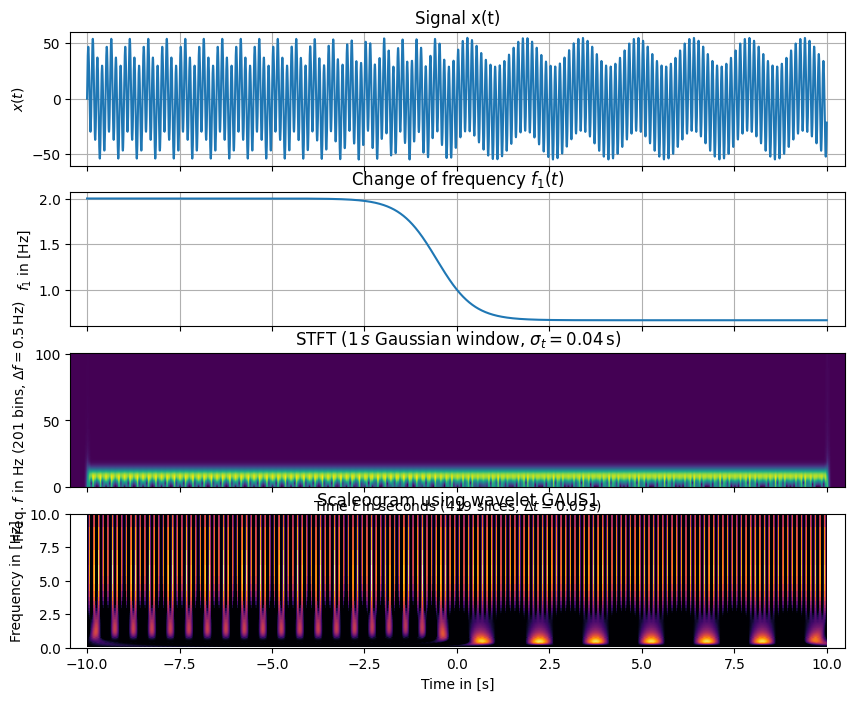

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi as π
from scipy.signal import ShortTimeFFT
import pywt
from scipy.signal.windows import gaussian

f_s = 200              # Sampling rate = number of measurements per second in [Hz]
t   = np.arange(-10,10, 1 / f_s) # Time between [-10s,10s].
T1  = np.tanh(t)/2  + 1.0 # Period in [s]
T2  = 0.125               # Period in [s]
f1  = 1 / T1              # Frequency in [Hz]
f2  = 1 / T2              # Frequency in [Hz]

N = len(t)
x = 13 * np.sin(2 * π * f1 * t) + 42 * np.sin(2 * π * f2 * t)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = True, figsize = (10,8))

# Signal
ax1.plot(t, x)
ax1.grid(True)
ax1.set_ylabel("$x(t)$")
ax1.set_title("Signal x(t)")

# Frequency change
ax2.plot(t, f1)
ax2.grid(True)
ax2.set_ylabel("$f_1$ in [Hz]")
ax2.set_title("Change of frequency $f_1(t)$")

# Moving fourier transform, i.e. spectrogram
Δt = 4 # window length in [s]
Nw = np.int32(2**np.round(np.log2(Δt * f_s))) # Number of datapoints within window
g_std = 8  # standard deviation for Gaussian window in samples
w = gaussian(200, std=g_std, sym=True)  # symmetric Gaussian window
print(len(w))
SFT = ShortTimeFFT(w, hop=10, fs=f_s, mfft=2*len(w), scale_to='magnitude')
Sx = SFT.stft(x)  # perform the STFT
# f, t_, Sxx = spectrogram(x, f_s, window='hanning', nperseg=Nw, noverlap = Nw - 100, detrend=False, scaling='spectrum')

Δf  = SFT.delta_f
Δt_ = SFT.delta_t

t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot
ax3.set_title(rf"STFT ({SFT.m_num*SFT.T:g}$\,s$ Gaussian window, " +
              rf"$\sigma_t={g_std*SFT.T}\,$s)")
ax3.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)")
print(t_lo)
t_lo=t_lo-10
print(t_hi)
# ,         xlim=(t_lo, t_hi))
print(SFT.extent(N))
V=SFT.extent(N)
print(V[0])
B=[V[0]-10,V[1]-10,V[2],V[3]]

im1 = ax3.imshow(abs(Sx), origin='lower', aspect='auto',
                 extent=B, cmap='viridis')


# Wavelet transform, i.e. scaleogram
cwtmatr, freqs = pywt.cwt(x, np.arange(1, 512), "gaus1", sampling_period = 1 / f_s)
im2 = ax4.pcolormesh(t, freqs, cwtmatr, vmin=0, cmap = "inferno" )
ax4.set_ylim(0,10)
ax4.set_ylabel("Frequency in [Hz]")
ax4.set_xlabel("Time in [s]")
ax4.set_title("Scaleogram using wavelet GAUS1")

# plt.savefig("./fourplot.pdf")

plt.show()

**Preguntas del laboratorio**

1.Implementar un detector de peaks R y mostrar un ejemplo donde se aplique el detector


(10000.0, 5000.0)

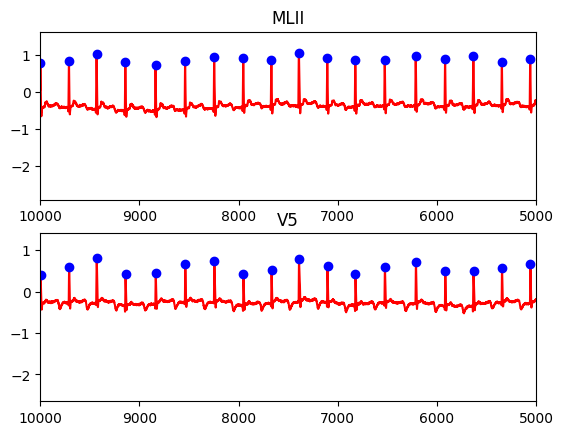

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

#Se leen los datos de la base de datos

record = wfdb.rdrecord('100')

#Se crea un array con cada señal utilizada

MLII = record.p_signal[:,0]
V5 = record.p_signal[:,1]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)
pV5 = find_peaks(V5, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])
p2V5 = np.array(pV5[0])

#Graficas de la deteccion de puntos


plt.subplot(2,1,1)
plt.title("MLII")
plt.plot(MLII,'-r')
plt.plot(p2MLII,MLII[p2MLII],'ob')
plt.xlim(right=5000)
plt.xlim(left=10000)

plt.subplot(2,1,2)
plt.title("V5")
plt.plot(V5,'-r')
plt.plot(p2V5,V5[p2V5],'ob')
plt.xlim(right=5000)
plt.xlim(left=10000)

Agregar ruido a la señal y presentar resultados\
1- gaussiano (media = 0 , std=1)\


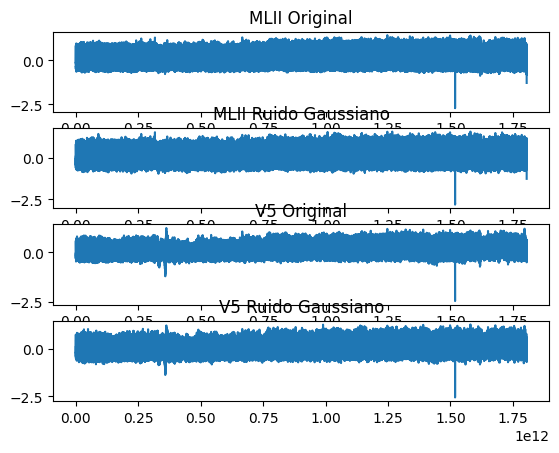

In [7]:
from ssl import VERIFY_X509_PARTIAL_CHAIN
#Caracteristicas
media = 0        # Media del ruido
desviacion_std = 0.1  # Desviación estándar del ruido

k=record.to_dataframe()
MLII=k['MLII']
V5=k['V5']

# Generar ruido gaussiano

MLII_ruido_gaussiano = MLII + np.random.normal(media, desviacion_std, len(MLII))
V5_ruido_gaussiano = V5 + np.random.normal(media, desviacion_std, len(V5))


plt.subplot(4,1,1)
plt.title('MLII Original')
plt.plot(MLII)
plt.subplot(4,1,2)
plt.title('MLII Ruido Gaussiano')
plt.plot(MLII_ruido_gaussiano)

plt.subplot(4,1,3)
plt.title('V5 Original')
plt.plot(V5)
plt.subplot(4,1,4)
plt.title('V5 Ruido Gaussiano')
plt.plot(V5_ruido_gaussiano)



2- Una componente de 50Hz con amplitud unitaria


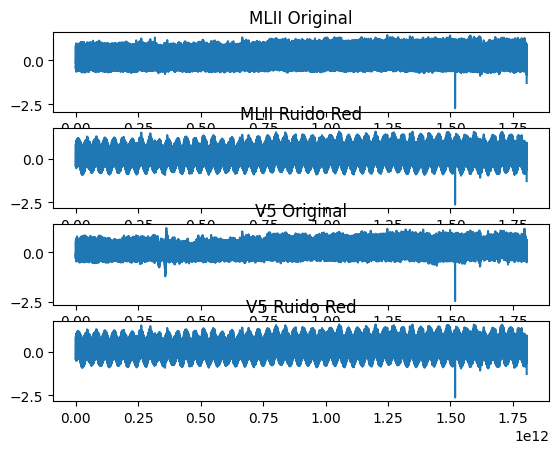

In [8]:



MLII_ruido_red = MLII + 0.25 * np.sin(2 * np.pi * 50 * np.linspace(0, 1, len(MLII)))
V5_ruido_red = MLII + 0.25 * np.sin(2 * np.pi * 50 * np.linspace(0, 1, len(V5)))


plt.subplot(4,1,1)
plt.title('MLII Original')
plt.plot(MLII)
plt.subplot(4,1,2)
plt.title('MLII Ruido Red')
plt.plot(MLII_ruido_red)

plt.subplot(4,1,3)
plt.title('V5 Original')
plt.plot(V5)
plt.subplot(4,1,4)
plt.title('V5 Ruido Red')
plt.plot(V5_ruido_red)




3- Utilizando la información de las marcas en el dataset MIT-BIH, cuantificar la precisión
del detector


thresholdTime: 0.002777777777777778 [s]
2273
25
111
229
261
341
369
370
440
455
516
565
601
703
704
769
789
888
960
987
996
1015
1019
1027
1095
1103
1104
1117
1154
1188
1191
1194
1206
1242
1260
1269
1340
1341
1343
1404
1409
1491
1520
1528
1542
1571
1601
1617
1660
1705
1728
1749
1761
1774
1793
1808
1851
1906
1919
1952
1962
1976
2020
2030
2142
2181
2184
2195
2197
2202
2240
2251
2260
true_positives: 2201
false_negative: 73
false_positive: 73
relationship: 0.9377929271410311


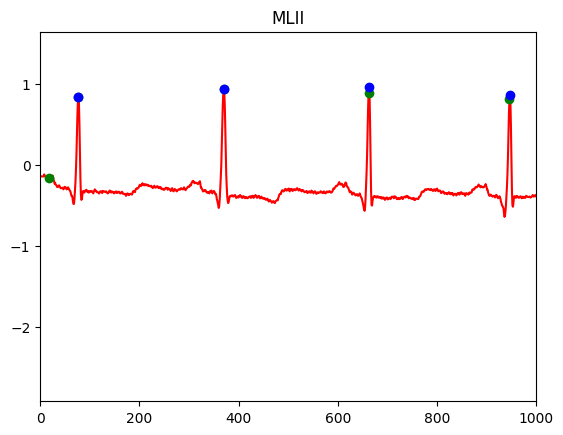

In [9]:
import pywt
import wfdb
import pandas as pd
# Cargar el registro de ECG y las anotaciones

ann = wfdb.rdann('100', 'atr')  # Cargar las anotaciones de picos R

true_peaks = ann.sample  # Anotaciones de los picos R verdaderos

#Se leen los datos de la base de datos

record = wfdb.rdrecord('100')

#Se crea un array con cada señal utilizada

MLII = record.p_signal[:,0]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

true_peaks = true_peaks[0:len(true_peaks)]

plt.title("MLII")
plt.plot(MLII,'-r')
plt.plot(true_peaks, MLII[true_peaks], 'og', label='True R-peaks')
plt.plot(p2MLII,MLII[p2MLII],'ob')
plt.xlim(right=1000)
plt.xlim(left=0)

threshold = 1

T = 1/360

thresholdTime = T * threshold

print(f"thresholdTime: {thresholdTime} [s]")

true_positives = 0
false_positives = 0
false_negatives = 0
deteccion = 0

print(len(p2MLII))

for i in range(len(true_peaks)):

  for j in range(len(p2MLII)):

    if np.abs(true_peaks[i] - p2MLII[j]) <= threshold:
        true_positives += 1
        deteccion = 1

  if deteccion == 0:
    false_negatives += 1

  deteccion = 0

for i in range(len(p2MLII)):

  for j in range(len(true_peaks)):

    if np.abs(p2MLII[i] - true_peaks[j]) <= threshold:
        deteccion = 1

  if deteccion == 0:
    false_positives += 1
    print(i)

  deteccion = 0

false_positives = len(true_peaks) - true_positives

print(f"true_positives: {true_positives}")
print(f"false_negative: {false_negatives}")
print(f"false_positive: {false_positives}")

relationship = true_positives / (false_negatives + false_positives + true_positives)

print(f"relationship: {relationship}")


3.1- Utilizando la información de las marcas en el dataset MIT-BIH, cuantificar la precisión del detector **con ruido**

thresholdTime: 0.005555555555555556 [s]
true_positives: 2227
false_negative: 47
false_positive: 47
relationship: 0.959500215424386


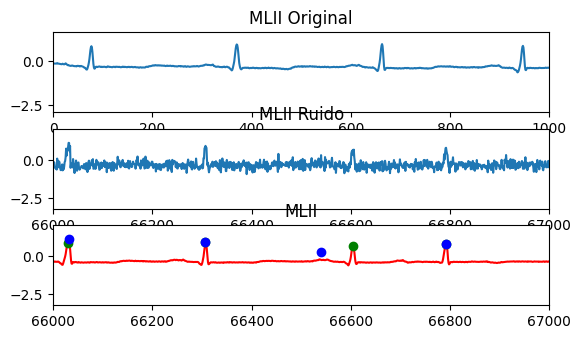

In [16]:
# Cargar el registro de ECG y las anotaciones

ann = wfdb.rdann('100', 'atr')  # Cargar las anotaciones de picos R

true_peaks = ann.sample  # Anotaciones de los picos R verdaderos

#Se leen los datos de la base de datos

record = wfdb.rdrecord('100')

#Se crea un array con cada señal utilizada

media = 0        # Media del ruido
desviacion_std = 0.2  # Desviación estándar del ruido


MLII = record.p_signal[:,0]

MLII_ruido_gaussiano = MLII + np.random.normal(media, desviacion_std, len(MLII))
MLII_ruido_red = MLII + 0.25 * np.sin(2 * np.pi * 50 * np.linspace(0, 1, len(MLII)))

plt.subplot(4,1,1)
plt.title('MLII Original')
plt.plot(MLII)
plt.xlim(right=1000)
plt.xlim(left=0)
plt.subplot(4,1,2)
plt.title('MLII Ruido')
plt.plot(MLII_ruido_gaussiano)
plt.xlim(right=67000)
plt.xlim(left=66000)

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII_ruido_gaussiano, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

true_peaks = true_peaks[0:len(true_peaks)]
plt.subplot(4,1,3)
plt.title("MLII")
plt.plot(MLII,'-r')
plt.plot(true_peaks, MLII_ruido_gaussiano[true_peaks], 'og', label='True R-peaks')
plt.plot(p2MLII,MLII_ruido_gaussiano[p2MLII],'ob')
plt.xlim(right=67000)
plt.xlim(left=66000)

threshold = 2

T = 1/360

thresholdTime = T * threshold

print(f"thresholdTime: {thresholdTime} [s]")

true_positives = 0
false_positives = 0
false_negatives = 0
deteccion = 0

for i in range(len(true_peaks)):

  for j in range(len(p2MLII)):

    if np.abs(true_peaks[i] - p2MLII[j]) <= threshold:
        true_positives += 1
        deteccion = 1

  if deteccion == 0:
    false_negatives += 1

  deteccion = 0

for i in range(len(p2MLII)):

  for j in range(len(true_peaks)):

    if np.abs(p2MLII[i] - true_peaks[j]) <= threshold:
        deteccion = 1

  if deteccion == 0:
    false_positives += 1

  deteccion = 0

false_positives = len(true_peaks) - true_positives

print(f"true_positives: {true_positives}")
print(f"false_negative: {false_negatives}")
print(f"false_positive: {false_positives}")

relationship = true_positives / (false_negatives + false_positives + true_positives)

print(f"relationship: {relationship}")


Gráfica de Precisión 

relationship_array: [0.5805958747135218, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9381733021077283, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9390815370196813, 0.9399906235349273, 0.9399906235349273]


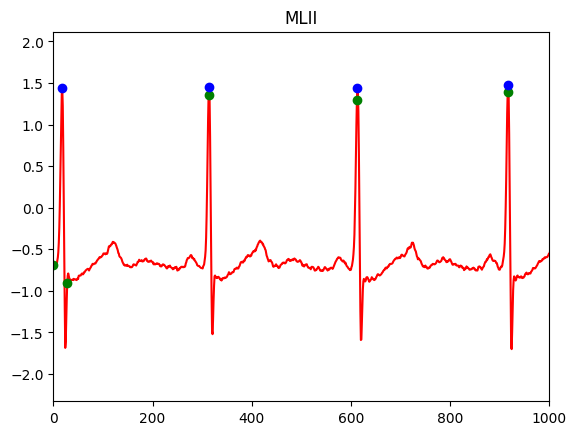

In [31]:
import pywt
import wfdb
import pandas as pd
# Cargar el registro de ECG y las anotaciones

ann = wfdb.rdann('220', 'atr')  # Cargar las anotaciones de picos R

true_peaks = ann.sample  # Anotaciones de los picos R verdaderos

#Se leen los datos de la base de datos

record = wfdb.rdrecord('220')

#Se crea un array con cada señal utilizada

MLII = record.p_signal[:,0]

#Se usa la funcion find_peaks para buscar los peaks con una distancia de 200
#obtenida de observar que los peaks ocurren cada 200 muestras aprox

pMLII = find_peaks(MLII, height=None, distance=200)

#Se crea un array solo con los puntos obtenidos

p2MLII = np.array(pMLII[0])

true_peaks = true_peaks[0:len(true_peaks)]

plt.title("MLII")
plt.plot(MLII,'-r')
plt.plot(true_peaks, MLII[true_peaks], 'og', label='True R-peaks')
plt.plot(p2MLII,MLII[p2MLII],'ob')
plt.xlim(right=1000)
plt.xlim(left=0)

threshold_max = 20

relationship_array = []

for threshold in range(1,threshold_max):
  #threshold = 1

  T = 1/360

  thresholdTime = T * threshold


  true_positives = 0
  false_positives = 0
  false_negatives = 0
  deteccion = 0



  for i in range(len(true_peaks)):

    for j in range(len(p2MLII)):

      if np.abs(true_peaks[i] - p2MLII[j]) <= threshold:
          true_positives += 1
          deteccion = 1

    if deteccion == 0:
      false_negatives += 1

    deteccion = 0

  for i in range(len(p2MLII)):

    for j in range(len(true_peaks)):

      if np.abs(p2MLII[i] - true_peaks[j]) <= threshold:
          deteccion = 1

    if deteccion == 0:
      false_positives += 1
      

    deteccion = 0

  false_positives = len(true_peaks) - true_positives

  relationship = true_positives / (false_negatives + false_positives + true_positives)

  relationship_array.append(relationship)

#print(f"relationship: {relationship}")

print(f"relationship_array: {relationship_array}")



Text(0.5, 0, 'Threshold')

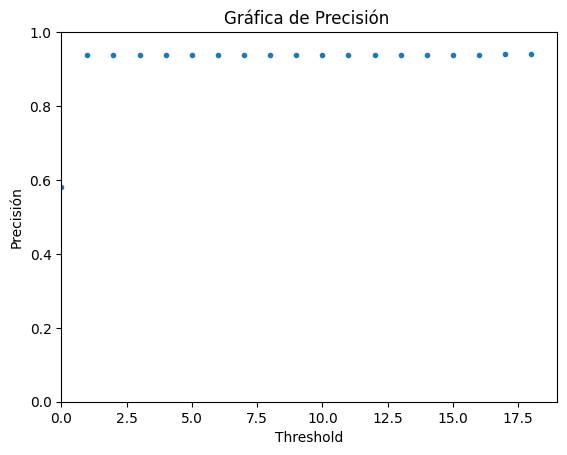

In [32]:
plt.title("Gráfica de Precisión ")
plt.plot(relationship_array,'.')
plt.xlim(right=19)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.ylabel("Precisión")
plt.xlabel("Threshold")

Calcular la variabilidad en la frecuencia cardiaca (HRV) en ventanas de 10[s], 30[s] y
60[s]. Presentar resultados en 2 participantes


In [ ]:
#HR = (p2MLII)

tiempo2muestras = 360 * 10

for x in range(0,len(pMLII)):
  print(pMLII[x])


print(print(pMLII[1]))

heartbeat_count = 0

for i in range(0,tiempo2muestras ,len(p2MLII)):
  for j in range(i,i+tiempo2muestras):
    heartbeat_count = heartbeat_count + pMLII[j]/pMLII[j]

print(heartbeat_count)





[    77    370    663 ... 649485 649734 649991]
{}
{}
None
